### Project Objectives and questions to answer

1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)
7. 3 o'clock pulse 
8. percent change graphic 

 
- This project intends to extract and load 1 year of data on three etf's... 
   - Nasdaq (QQQ)
   - SPider (SPY) 
   - Dow Industrial (DIA)
   
The goal is to find and use "important" technical features to and ultiately, predict the prices of the three stock above. 

In [66]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
import math


In [67]:
#!pip install  pandas_datareader 
#from pandas_datareader._utils import RemoteDataError


In [68]:
import pandas_datareader as dr
from pandas_datareader._utils import RemoteDataError
from pandas_datareader import data
from datetime import datetime

## Defining variables for future use in some helpful functions. (I may want to use this  code later to create a dashboard for any ticker)

In [69]:
Start = '2019 -01-01'
End = str(datetime.now().strftime('%Y-%m-%d'))

In [70]:
Invesco = 'QQQ'
Dow = 'DIA'
Spyder = 'SPY' 

In [71]:
# creating a function that will gather data on each stock called get_data

def get_data(ticker):
    try:
        stock_data = data.DataReader(ticker,'yahoo',Start, End)
        print(stock_data)
        
    except RemoteDataError:
        print(" No data found for {t}".format(t=ticker))
         

In [72]:
def get_stats(stock_data):
    return {
        'last': np.mean(stock_data.tail(1))
    }

In [73]:
def clean(stock_data,col):
    wkdays = pd.date_range_(start = Start, end=End)
    clean_data = stock_data[col].reindex(wkdays)
    return clean_data.ffilna(method = 'ffill')

In [74]:
get_data(Dow)

                  High         Low        Open       Close     Volume  \
Date                                                                    
2019-01-02  234.000000  229.139999  229.270004  233.360001  5319500.0   
2019-01-03  231.419998  226.360001  231.250000  226.720001  7350200.0   
2019-01-04  235.179993  229.729996  230.000000  234.279999  7343700.0   
2019-01-07  236.880005  232.949997  234.839996  235.360001  5101600.0   
2019-01-08  238.660004  235.789993  237.940002  237.919998  4845800.0   
...                ...         ...         ...         ...        ...   
2021-04-05  336.149994  333.910004  333.940002  335.200012  5632700.0   
2021-04-06  335.420013  333.779999  334.690002  334.369995  2987500.0   
2021-04-07  335.170013  333.440002  334.140015  334.369995  2658500.0   
2021-04-08  335.149994  333.429993  334.299988  335.130005  2665000.0   
2021-04-09  338.079987  335.359985  335.720001  337.859985  3026400.0   

             Adj Close  
Date                    


In [75]:
get_data(Dow)

                  High         Low        Open       Close     Volume  \
Date                                                                    
2019-01-02  234.000000  229.139999  229.270004  233.360001  5319500.0   
2019-01-03  231.419998  226.360001  231.250000  226.720001  7350200.0   
2019-01-04  235.179993  229.729996  230.000000  234.279999  7343700.0   
2019-01-07  236.880005  232.949997  234.839996  235.360001  5101600.0   
2019-01-08  238.660004  235.789993  237.940002  237.919998  4845800.0   
...                ...         ...         ...         ...        ...   
2021-04-05  336.149994  333.910004  333.940002  335.200012  5632700.0   
2021-04-06  335.420013  333.779999  334.690002  334.369995  2987500.0   
2021-04-07  335.170013  333.440002  334.140015  334.369995  2658500.0   
2021-04-08  335.149994  333.429993  334.299988  335.130005  2665000.0   
2021-04-09  338.079987  335.359985  335.720001  337.859985  3026400.0   

             Adj Close  
Date                    


In [76]:
get_data(Invesco)

                  High         Low        Open       Close      Volume  \
Date                                                                     
2019-01-02  155.750000  150.880005  150.990005  154.880005  58576700.0   
2019-01-03  153.259995  149.490005  152.600006  149.820007  74820200.0   
2019-01-04  157.000000  151.740005  152.339996  156.229996  74709300.0   
2019-01-07  158.860001  156.110001  156.619995  158.089996  52059300.0   
2019-01-08  160.110001  157.199997  159.539993  159.520004  49388700.0   
...                ...         ...         ...         ...         ...   
2021-04-05  331.839996  326.880005  327.130005  331.049988  42172500.0   
2021-04-06  332.829987  330.019989  330.730011  330.820007  33537200.0   
2021-04-07  332.480011  329.369995  330.329987  331.619995  32046400.0   
2021-04-08  335.269989  333.739990  334.559998  335.079987  29940800.0   
2021-04-09  337.320007  332.920013  333.679993  337.109985  36580600.0   

             Adj Close  
Date        

In [77]:
get_data(Spyder)

                  High         Low        Open       Close       Volume  \
Date                                                                      
2019-01-02  251.210007  245.949997  245.979996  250.179993  126925200.0   
2019-01-03  248.570007  243.669998  248.229996  244.210007  144140700.0   
2019-01-04  253.110001  247.169998  247.589996  252.389999  142628800.0   
2019-01-07  255.949997  251.690002  252.690002  254.380005  103139100.0   
2019-01-08  257.309998  254.000000  256.820007  256.769989  102512600.0   
...                ...         ...         ...         ...          ...   
2021-04-05  406.940002  403.380005  403.459991  406.359985   91684800.0   
2021-04-06  407.239990  405.399994  405.760010  406.119995   62021000.0   
2021-04-07  406.959991  405.450012  405.940002  406.589996   55836300.0   
2021-04-08  408.579987  406.929993  407.929993  408.519989   57863100.0   
2021-04-09  411.670013  408.260010  408.390015  411.489990   61060100.0   

             Adj Close  

#### An alternate method of gathering data for more than one ticker at a time. 

## Importing stock prices from Yahoo Finance. 

In [78]:
#!pip install yfinance
import yfinance as yf 

In [79]:
ticker = "QQQ"

In [80]:
Nasdaq = yf.download(ticker, start = "2020-1-1", end = "2021-2-19")

[*********************100%***********************]  1 of 1 completed


In [81]:
type(Nasdaq)

pandas.core.frame.DataFrame

In [82]:
# getting data for more than one stock(or etf)

ticks = ['QQQ','SPY','DIA']

In [83]:
etfs = yf.download(ticks, start = "2020-1-1", end = "2021-2-19", rounding = True, group_by = "ticker")
etfs

[*********************100%***********************]  3 of 3 completed


QQQ                                                   DIA  \
              Open    High     Low   Close Adj Close      Volume    Open   
Date                                                                       
2020-01-02  214.40  216.16  213.98  216.16    214.67  30969400.0  286.44   
2020-01-03  213.30  215.47  213.28  214.18    212.70  27518900.0  285.34   
2020-01-06  212.50  215.59  212.24  215.56    214.07  21655300.0  284.29   
2020-01-07  215.64  216.14  214.85  215.53    214.04  22139300.0  286.30   
2020-01-08  215.50  218.14  215.16  217.15    215.65  26397300.0  285.32   
...            ...     ...     ...     ...       ...         ...     ...   
2021-02-12  333.71  336.62  332.63  336.45    336.03  20318000.0  314.28   
2021-02-16  337.27  338.19  334.34  335.54    335.12  27080800.0  316.33   
2021-02-17  332.47  335.66  330.17  333.93    333.51  31360300.0  314.69   
2021-02-18  330.23  333.87  328.36  332.47    332.05  32236200.0  314.75   
2021-02-19     NaN     NaN     NaN     NaN       NaN         NaN     NaN   

                                                            SPY          \
              High     Low   Close Adj Close     Volume    Open    High   
Date                                                                      
2020-01-02  288.63  286.15  288.62    281.25  3865500.0  323.54  324.89   
2020-01-03  287.11  285.18  286.32    279.01  3296700.0  321.16  323.64   
2020-01-06  287.03  284.16  286.98    279.65  1645100.0  320.49  323.73   
2020-01-07  286.79  285.58  285.74    278.44  1413000.0  323.02  323.54   
2020-01-08  288.67  285.08  287.40    280.06  3136700.0  322.94  325.78   
...            ...     ...     ...       ...        ...     ...     ...   
2021-02-12  315.14  313.83  315.04    313.80  2478800.0  389.85  392.90   
2021-02-16  316.54  314.87  315.58    314.34  1836300.0  393.96  394.17   
2021-02-17  316.91  313.87  316.60    315.35  2007400.0  390.42  392.66   
2021-02-18  316.00  313.38  315.56    314.32  2609600.0  389.59  391.52   
2021-02-19     NaN     NaN     NaN       NaN        NaN     NaN     NaN   

                                                  
               Low   Close Adj Close      Volume  
Date                                              
2020-01-02  322.53  324.87    317.87  59151200.0  
2020-01-03  321.10  322.41    315.47  77709700.0  
2020-01-06  320.36  323.64    316.67  55653900.0  
2020-01-07  322.24  322.73    315.78  40496400.0  
2020-01-08  322.67  324.45    317.46  68296000.0  
...            ...     ...       ...         ...  
2021-02-12  389.77  392.64    391.36  50505700.0  
2021-02-16  391.53  392.30    391.02  50972400.0  
2021-02-17  389.33  392.39    391.11  52290600.0  
2021-02-18  387.74  390.72    389.44  59712800.0  
2021-02-19     NaN     NaN       NaN         NaN  

[286 rows x 18 columns]

In [84]:
etfs_close = yf.download(ticks, start = "2020-1-1", end = "2021-2-19", rounding = True)["Close"]
etfs_close

[*********************100%***********************]  3 of 3 completed


,DIA,QQQ,SPY
Date,,,
2020-01-02,288.62,216.16,324.87
2020-01-03,286.32,214.18,322.41
2020-01-06,286.98,215.56,323.64
2020-01-07,285.74,215.53,322.73
2020-01-08,287.40,217.15,324.45
...,...,...,...
2021-02-12,315.04,336.45,392.64
2021-02-16,315.58,335.54,392.30
2021-02-17,316.60,333.93,392.39


In [85]:
etfs_close.head()

,DIA,QQQ,SPY
Date,,,
2020-01-02,288.62,216.16,324.87
2020-01-03,286.32,214.18,322.41
2020-01-06,286.98,215.56,323.64
2020-01-07,285.74,215.53,322.73
2020-01-08,287.40,217.15,324.45


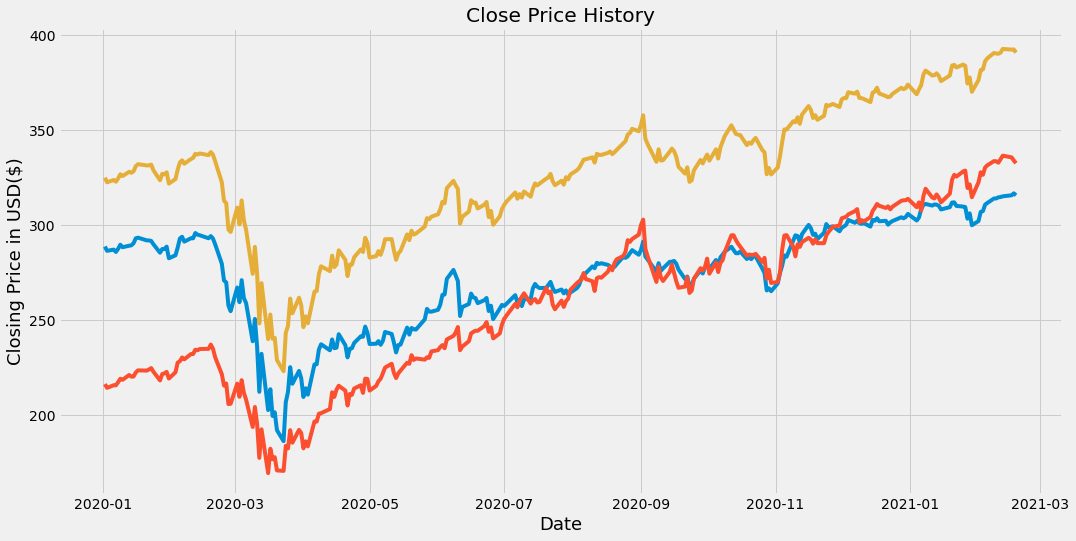

In [86]:
# Visualize the closing price history 
plt.figure(figsize = (16,8))
plt.title("Close Price History")
plt.plot(etfs_close)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price in USD($)', fontsize = 18)

plt.show()

In [88]:
etfs_close['DOW_Chnge']= etfs_close.DIA - etfs_close.DIA.shift(1)
etfs_close['NASDQ_Chnge']= etfs_close.QQQ - etfs_close.QQQ.shift(1)
etfs_close['SPYDR_Chnge']= etfs_close.SPY - etfs_close.SPY.shift(1)
# adding in columns for daily change in closing etf prices

In [89]:
etfs_close['QQQ_per_chnge'] = etfs_close['NASDQ_Chnge'].pct_change().round(4)
etfs_close['DIA_per_chnge'] = etfs_close['DOW_Chnge'].pct_change().round(4)
etfs_close['SPY_per_chnge'] = etfs_close['SPYDR_Chnge'].pct_change().round(4)
# adding in cloumns for percent change

In [90]:
etfs_close.head(4)

,DIA,QQQ,SPY,DOW_Chnge,NASDQ_Chnge,SPYDR_Chnge,QQQ_per_chnge,DIA_per_chnge,SPY_per_chnge
Date,,,,,,,,,
2020-01-02,288.62,216.16,324.87,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,286.32,214.18,322.41,-2.30,-1.98,-2.46,NaN,NaN,NaN
2020-01-06,286.98,215.56,323.64,0.66,1.38,1.23,-1.6970,-1.2870,-1.5000
2020-01-07,285.74,215.53,322.73,-1.24,-0.03,-0.91,-1.0217,-2.8788,-1.7398


In [91]:
type(etfs_close)

pandas.core.frame.DataFrame

In [92]:
etfs_close['QQQ_per_chnge']

Date
2020-01-02        NaN
2020-01-03        NaN
2020-01-06    -1.6970
2020-01-07    -1.0217
2020-01-08   -55.0000
               ...   
2021-02-12     0.0219
2021-02-16    -1.4866
2021-02-17     0.7692
2021-02-18    -0.0932
2021-02-19     0.0000
Name: QQQ_per_chnge, Length: 286, dtype: float64

In [93]:
etfs_close['DIA_per_chnge'] 


Date
2020-01-02       NaN
2020-01-03       NaN
2020-01-06   -1.2870
2020-01-07   -2.8788
2020-01-08   -2.3387
               ...  
2021-02-12    1.0000
2021-02-16    0.5000
2021-02-17    0.8889
2021-02-18   -2.0196
2021-02-19    0.0000
Name: DIA_per_chnge, Length: 286, dtype: float64

In [94]:
etfs_close['SPY_per_chnge'] 

Date
2020-01-02        NaN
2020-01-03        NaN
2020-01-06    -1.5000
2020-01-07    -1.7398
2020-01-08    -2.8901
               ...   
2021-02-12     2.0635
2021-02-16    -1.1762
2021-02-17    -1.2647
2021-02-18   -19.5556
2021-02-19     0.0000
Name: SPY_per_chnge, Length: 286, dtype: float64

In [95]:
etfs_chnge = etfs_close.loc[:,['QQQ_per_chnge','DIA_per_chnge','SPY_per_chnge']].dropna(how = 'all')
etfs_chnge.head(2)

,QQQ_per_chnge,DIA_per_chnge,SPY_per_chnge
Date,,,
2020-01-06,-1.6970,-1.2870,-1.5000
2020-01-07,-1.0217,-2.8788,-1.7398


## Third version with a slight modification of the 2nd... Only pulling info on QQQ to be sure things work.


In [97]:
df1= dr.DataReader('SPY', data_source= 'yahoo', start = '2020-02-12',end= '2021-04-06')
df1 =df1.round(2)
df1

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-12,337.65,336.43,336.83,337.42,43992700.0,330.15
2020-02-13,338.12,335.56,335.86,337.06,54501900.0,329.80
2020-02-14,337.73,336.20,337.51,337.60,64582200.0,330.33
2020-02-18,337.67,335.21,336.51,336.73,57226200.0,329.48
2020-02-19,339.08,337.48,337.79,338.34,48814700.0,331.05
...,...,...,...,...,...,...
2021-03-30,395.45,393.02,394.42,394.73,76262200.0,394.73
2021-03-31,398.00,395.31,395.34,396.33,112734200.0,396.33
2021-04-01,400.67,398.18,398.40,400.61,99599100.0,400.61


In [98]:
window = 1 
col_pct_chng = "pct_chng" + "_" +str(window)
df1['col_pct_chng'] = df1.Close.pct_change(window)*100
df1['col_pct_chng'].round(4)

Date
2020-02-12       NaN
2020-02-13   -0.1067
2020-02-14    0.1602
2020-02-18   -0.2577
2020-02-19    0.4781
               ...  
2021-03-30   -0.2653
2021-03-31    0.4053
2021-04-01    1.0799
2021-04-05    1.4353
2021-04-06   -0.0591
Name: col_pct_chng, Length: 289, dtype: float64

In [99]:
df1.head()


,High,Low,Open,Close,Volume,Adj Close,col_pct_chng
Date,,,,,,,
2020-02-12,337.65,336.43,336.83,337.42,43992700.0,330.15,NaN
2020-02-13,338.12,335.56,335.86,337.06,54501900.0,329.80,-0.106692
2020-02-14,337.73,336.20,337.51,337.60,64582200.0,330.33,0.160209
2020-02-18,337.67,335.21,336.51,336.73,57226200.0,329.48,-0.257701
2020-02-19,339.08,337.48,337.79,338.34,48814700.0,331.05,0.478128


In [100]:
df1['Closing_Chnge'] = df1.Close - df1.Close.shift(1)

In [101]:
df1.head()

,High,Low,Open,Close,Volume,Adj Close,col_pct_chng,Closing_Chnge
Date,,,,,,,,
2020-02-12,337.65,336.43,336.83,337.42,43992700.0,330.15,NaN,NaN
2020-02-13,338.12,335.56,335.86,337.06,54501900.0,329.80,-0.106692,-0.36
2020-02-14,337.73,336.20,337.51,337.60,64582200.0,330.33,0.160209,0.54
2020-02-18,337.67,335.21,336.51,336.73,57226200.0,329.48,-0.257701,-0.87
2020-02-19,339.08,337.48,337.79,338.34,48814700.0,331.05,0.478128,1.61


C:\Users\jharbour\Anaconda3\envs\Tensorflow\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jharbour\Anaconda3\envs\Tensorflow\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 1.,  1.,  1.,  0.,  1.,  0.,  4.,  9.,  8., 16., 43., 67., 71.,
        43., 12.,  3.,  3.,  2.,  1.,  2.]),
 array([-29.47 , -26.936, -24.402, -21.868, -19.334, -16.8  , -14.266,
        -11.732,  -9.198,  -6.664,  -4.13 ,  -1.596,   0.938,   3.472,
          6.006,   8.54 ,  11.074,  13.608,  16.142,  18.676,  21.21 ]),
 <BarContainer object of 20 artists>)

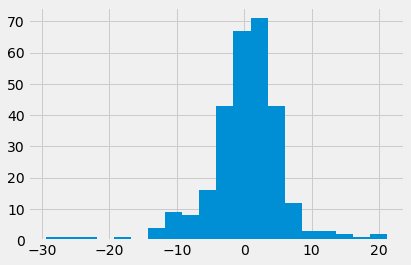

In [102]:
plt.hist(df1['Closing_Chnge'], bins= 20)

### Using Beautiful Soup to scrape headlines from Finviz 

In [9]:
#from urlib.request import urlopen, Request
#! pip install bs4
from bs4 import BeautifulSoup

In [10]:
#!pip install requests
import requests
from urllib.request import urlopen, Request

In [115]:
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['SPY']

In [116]:
news_tables = {} 

for ticker in tickers:
    url = finviz_url + ticker
    req = Request(url = url, headers = {'user-agent':'my-app'})
    response = urlopen(req)
    
    html = BeautifulSoup(response, 'html')
    news_table = html.find(id = "news-table") 
    news_tables[ticker]= news_table
    
    
print(news_tables)

{'SPY': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
<tr><td align="right" style="white-space:nowrap" width="130">Apr-10-21 07:49PM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.fool.com/investing/2021/04/10/this-1-stock-market-chart-will-make-you-a-smarter/?source=eptyholnk0000202&amp;utm_source=yahoo-host&amp;utm_medium=feed&amp;utm_campaign=article" target="_blank">This 1 Stock Market Chart Will Make You a Smarter Investor</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Motley Fool</span></div></div></td></tr>
<tr><td align="right" width="130">08:22AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/this-is-the-single-worst-time-to-be-a-passive-investor-veteran-value-investor-122245980.html" target="_blank">This i

In [13]:
#print(news_tables)

### Starting scratch code to parse the text from the webpage

In [15]:
# testing code on QQQ

spy_data = news_tables['SPY']    
spy_rows = spy_data.find_all('tr')

In [16]:
spy_rows

[<tr><td align="right" style="white-space:nowrap" width="130">Apr-10-21 07:49PM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.fool.com/investing/2021/04/10/this-1-stock-market-chart-will-make-you-a-smarter/?source=eptyholnk0000202&amp;utm_source=yahoo-host&amp;utm_medium=feed&amp;utm_campaign=article" target="_blank">This 1 Stock Market Chart Will Make You a Smarter Investor</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Motley Fool</span></div></div></td></tr>,
 <tr><td align="right" width="130">08:22AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/this-is-the-single-worst-time-to-be-a-passive-investor-veteran-value-investor-122245980.html" target="_blank">This is the single worst time to be a passive investor: veteran investor</a></div><div class="news-link-right"><span st

In [18]:
for index, row in enumerate(spy_rows):
    title = row.a.text                # this looks for the anchor tag inside each table row and give the text
    timestamp = row.td.text           # pasring the timestamp using the td tag from the table 
    print(timestamp + " " + title)

Apr-10-21 07:49PM   This 1 Stock Market Chart Will Make You a Smarter Investor
08:22AM   This is the single worst time to be a passive investor: veteran investor
Apr-09-21 04:08PM   This week in Bidenomics
02:50PM   Stock market news live updates: Wall Street roars to new records ahead of earnings season
01:09PM   It's time to play defense as the bull market turns two: Strategist
Apr-08-21 04:06PM   Stock market news live updates: S&P 500 reaches record high as tech soars; yields steady
08:30AM   Jobless claims: Another 744,000 Americans filed new claims last week
06:00AM   Influencers with Andy Serwer: Gerald Chertavian
06:00AM   Corporations increased interest in hiring diverse candidates after killing of George Floyd: Year Up CEO
Apr-07-21 04:04PM   Stock market news live updates: Stocks drift near record highs
03:12PM   ETFs well-positioned to benefit from infrastructure spending
12:56PM   Is SPY Stock A Buy Right Now? What To Know About World's Top Index
10:29AM   Amazon, JPMorgan

In [19]:
# creating the parsed data for all tickers

parsed_data = []

for ticker, news_table in news_tables.items():
    
    for row in news_table.findAll('tr'):
        
        title = row.a.get_text()
        date_data = row.td.text.split(' ') # splitting the date based on length of timestamp to handle the different types of dates
    
        if len(date_data) == 1:
            time = date_data[0]
        else: 
            date = date_data[0]
            time = date_data[1]
            
        parsed_data.append([ticker, date, time, title])
    
print(parsed_data)

[['SPY', 'Apr-10-21', '07:49PM\xa0\xa0', 'This 1 Stock Market Chart Will Make You a Smarter Investor'], ['SPY', 'Apr-10-21', '08:22AM\xa0\xa0', 'This is the single worst time to be a passive investor: veteran investor'], ['SPY', 'Apr-09-21', '04:08PM\xa0\xa0', 'This week in Bidenomics'], ['SPY', 'Apr-09-21', '02:50PM\xa0\xa0', 'Stock market news live updates: Wall Street roars to new records ahead of earnings season'], ['SPY', 'Apr-09-21', '01:09PM\xa0\xa0', "It's time to play defense as the bull market turns two: Strategist"], ['SPY', 'Apr-08-21', '04:06PM\xa0\xa0', 'Stock market news live updates: S&P 500 reaches record high as tech soars; yields steady'], ['SPY', 'Apr-08-21', '08:30AM\xa0\xa0', 'Jobless claims: Another 744,000 Americans filed new claims last week'], ['SPY', 'Apr-08-21', '06:00AM\xa0\xa0', 'Influencers with Andy Serwer: Gerald Chertavian'], ['SPY', 'Apr-08-21', '06:00AM\xa0\xa0', 'Corporations increased interest in hiring diverse candidates after killing of George Fl

### Using NLTK Vader to analyze sentiment

In [20]:
#!pip install nltk

In [21]:
#nltk.download()

In [22]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

In [23]:
df = pd.DataFrame(parsed_data, columns =['ticker', 'date', 'time', 'title'] )

In [24]:
df.head()

,ticker,date,time,title
0,SPY,Apr-10-21,07:49PM,This 1 Stock Market Chart Will Make You a Smar...
1,SPY,Apr-10-21,08:22AM,This is the single worst time to be a passive ...
2,SPY,Apr-09-21,04:08PM,This week in Bidenomics
3,SPY,Apr-09-21,02:50PM,Stock market news live updates: Wall Street ro...
4,SPY,Apr-09-21,01:09PM,It's time to play defense as the bull market t...


In [25]:
df.tail()

,ticker,date,time,title
95,SPY,Mar-04-21,05:00AM,Suze Orman: Americans should save their stimul...
96,SPY,Mar-04-21,02:03AM,Top 3 Mutual Fund Holders of P&G
97,SPY,Mar-03-21,06:11PM,Stock market news live updates: Stock futures ...
98,SPY,Mar-03-21,04:14PM,Clean energy ETFs go from darlings to duds
99,SPY,Mar-03-21,04:00PM,Stock market news live updates: Stocks end low...


In [26]:
# initializing Vader to analyse text 
vader = SentimentIntensityAnalyzer()

In [27]:
#Example of vader scoring sample text based on the sentiment of words used
print(vader.polarity_scores("I don't think Apple is a horrible company. I think they will do poorly this quarter"))

{'neg': 0.226, 'neu': 0.774, 'pos': 0.0, 'compound': -0.5423}


In [28]:
# create a new column in dataframe of titles polarity scores 
f = lambda title: vader.polarity_scores(title)['compound']
df['sentiment']= df['title'].apply(f)

In [29]:
# looking at the sentiment of each of article title of df.head()
df.head(10)

,ticker,date,time,title,sentiment
0,SPY,Apr-10-21,07:49PM,This 1 Stock Market Chart Will Make You a Smar...,0.4588
1,SPY,Apr-10-21,08:22AM,This is the single worst time to be a passive ...,-0.5106
2,SPY,Apr-09-21,04:08PM,This week in Bidenomics,0.0000
3,SPY,Apr-09-21,02:50PM,Stock market news live updates: Wall Street ro...,0.0000
4,SPY,Apr-09-21,01:09PM,It's time to play defense as the bull market t...,0.4404
5,SPY,Apr-08-21,04:06PM,Stock market news live updates: S&P 500 reache...,0.0516
6,SPY,Apr-08-21,08:30AM,"Jobless claims: Another 744,000 Americans file...",0.0000
7,SPY,Apr-08-21,06:00AM,Influencers with Andy Serwer: Gerald Chertavian,0.0000
8,SPY,Apr-08-21,06:00AM,Corporations increased interest in hiring dive...,-0.0772
9,SPY,Apr-07-21,04:04PM,Stock market news live updates: Stocks drift n...,0.0000


In [30]:
df.tail()

,ticker,date,time,title,sentiment
95,SPY,Mar-04-21,05:00AM,Suze Orman: Americans should save their stimul...,0.4939
96,SPY,Mar-04-21,02:03AM,Top 3 Mutual Fund Holders of P&G,0.2023
97,SPY,Mar-03-21,06:11PM,Stock market news live updates: Stock futures ...,0.0000
98,SPY,Mar-03-21,04:14PM,Clean energy ETFs go from darlings to duds,0.7906
99,SPY,Mar-03-21,04:00PM,Stock market news live updates: Stocks end low...,-0.2960


In [31]:
# modifying the date column convrting into a date time format

df['Date']= pd.to_datetime(df.date).dt.date

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize = (40, 40))

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

In [37]:
%matplotlib inline

In [40]:
df

,ticker,date,time,title,sentiment,Date
0,SPY,Apr-10-21,07:49PM,This 1 Stock Market Chart Will Make You a Smar...,0.4588,2021-04-10
1,SPY,Apr-10-21,08:22AM,This is the single worst time to be a passive ...,-0.5106,2021-04-10
2,SPY,Apr-09-21,04:08PM,This week in Bidenomics,0.0000,2021-04-09
3,SPY,Apr-09-21,02:50PM,Stock market news live updates: Wall Street ro...,0.0000,2021-04-09
4,SPY,Apr-09-21,01:09PM,It's time to play defense as the bull market t...,0.4404,2021-04-09
...,...,...,...,...,...,...
95,SPY,Mar-04-21,05:00AM,Suze Orman: Americans should save their stimul...,0.4939,2021-03-04
96,SPY,Mar-04-21,02:03AM,Top 3 Mutual Fund Holders of P&G,0.2023,2021-03-04
97,SPY,Mar-03-21,06:11PM,Stock market news live updates: Stock futures ...,0.0000,2021-03-03
98,SPY,Mar-03-21,04:14PM,Clean energy ETFs go from darlings to duds,0.7906,2021-03-03


In [41]:
# this will return the daily average of each ticker's sentiment score
avg_df = df.groupby(['ticker','date']).mean()
avg_df = avg_df.unstack()
avg_df = avg_df.xs('sentiment',axis = "columns").transpose()

In [43]:
avg_df.head()

ticker,SPY
date,
Apr-01-21,0.118775
Apr-02-21,-0.025100
Apr-04-21,0.000000
Apr-05-21,0.000000
Apr-06-21,-0.278700


In [50]:
avg_df.isna().count()

#df3.QQQ = df3.QQQ.fillna(0)
#df3.SPY = df3.SPY.fillna(0)

ticker
SPY    34
dtype: int64

In [52]:
avg_df.fillna(0).head()

ticker,SPY
date,
Apr-01-21,0.118775
Apr-02-21,-0.025100
Apr-04-21,0.000000
Apr-05-21,0.000000
Apr-06-21,-0.278700


In [59]:
avg_df.describe

<bound method NDFrame.describe of ticker          SPY
date               
Apr-01-21  0.118775
Apr-02-21 -0.025100
Apr-04-21  0.000000
Apr-05-21  0.000000
Apr-06-21 -0.278700
Apr-07-21  0.210060
Apr-08-21 -0.006400
Apr-09-21  0.146800
Apr-10-21 -0.025900
Mar-03-21  0.164867
Mar-04-21  0.051160
Mar-05-21  0.062600
Mar-07-21  0.000000
Mar-08-21  0.236533
Mar-09-21  0.170200
Mar-10-21  0.224317
Mar-11-21 -0.178400
Mar-12-21  0.000000
Mar-14-21  0.000000
Mar-15-21  0.000000
Mar-16-21  0.101150
Mar-17-21 -0.163550
Mar-18-21  0.099700
Mar-19-21  0.000000
Mar-21-21  0.000000
Mar-22-21  0.409667
Mar-23-21 -0.053525
Mar-24-21  0.000000
Mar-25-21  0.081320
Mar-26-21  0.178525
Mar-28-21  0.510600
Mar-29-21  0.200950
Mar-30-21 -0.467750
Mar-31-21 -0.286650>

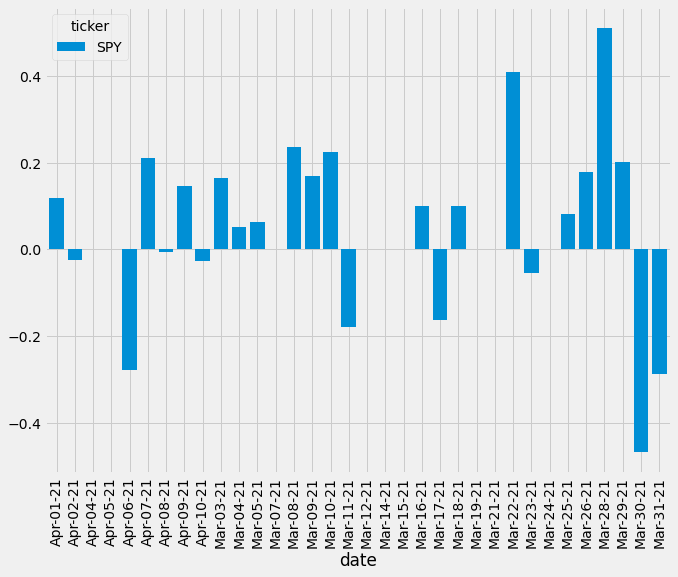

In [103]:
avg_df.plot(kind='bar', width = 0.8, figsize = (10,8))
plt.show()


In [266]:
# the bar plot shows that the stock sentiment seemed to be more negative for the Dow compared to the Nasdaq and S&p 500. This likely due to the type of 
# stock in each... the tech stocks were saoring during this time as were the top 500 companies. 

In [104]:
df2 = etfs_close
df3 = avg_df


In [105]:
df2

,DIA,QQQ,SPY,DOW_Chnge,NASDQ_Chnge,SPYDR_Chnge,QQQ_per_chnge,DIA_per_chnge,SPY_per_chnge
Date,,,,,,,,,
2020-01-02,288.62,216.16,324.87,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,286.32,214.18,322.41,-2.30,-1.98,-2.46,NaN,NaN,NaN
2020-01-06,286.98,215.56,323.64,0.66,1.38,1.23,-1.6970,-1.2870,-1.5000
2020-01-07,285.74,215.53,322.73,-1.24,-0.03,-0.91,-1.0217,-2.8788,-1.7398
2020-01-08,287.40,217.15,324.45,1.66,1.62,1.72,-55.0000,-2.3387,-2.8901
...,...,...,...,...,...,...,...,...,...
2021-02-12,315.04,336.45,392.64,0.36,1.87,1.93,0.0219,1.0000,2.0635
2021-02-16,315.58,335.54,392.30,0.54,-0.91,-0.34,-1.4866,0.5000,-1.1762
2021-02-17,316.60,333.93,392.39,1.02,-1.61,0.09,0.7692,0.8889,-1.2647


In [107]:
df3.shape

(34, 1)

In [117]:
avg_df.head(1)

ticker,SPY
date,
Apr-01-21,0.118775


# Change in price of the stock overtime

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [65]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [4]:
# The tech stocks we'll use for this analysis
tech_list = ['QQQ', 'SPY', 'DIA']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [5]:
#for company, company_name in zip(company_list, tech_list):
     #company["company_name"] = company_name

In [6]:
company_list = [QQQ, NDAQ, DOW]
company_name = ['QQQ', 'SPY', 'DIA']

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

NameError: name 'NDAQ' is not defined

In [7]:
# Summary Stats
QQQ.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,275.466255,270.209283,273.049282,273.080518,4.475519e+07,272.632194
std,39.488345,39.566474,39.791556,39.526420,2.160683e+07,39.750131
min,174.210007,164.929993,170.919998,170.460007,1.678500e+07,169.856216
25%,246.150002,242.305000,243.790001,243.975006,2.959445e+07,243.321968
50%,280.450012,274.859985,277.890015,277.839996,3.871610e+07,277.337311
75%,309.539993,303.869995,306.899994,307.415009,5.332900e+07,307.137024
max,338.190002,334.339996,337.269989,336.450012,1.385624e+08,336.450012


In [8]:
# General info
QQQ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-03-23 to 2021-03-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       251 non-null    float64
 1   Low        251 non-null    float64
 2   Open       251 non-null    float64
 3   Close      251 non-null    float64
 4   Volume     251 non-null    float64
 5   Adj Close  251 non-null    float64
dtypes: float64(6)
memory usage: 13.7 KB


## NEW ATTEMPT - USING STOCK SENTIMENT TO DETERMINE STOCK PRICE

This project is designed with the intent of using market sentiment from article headlines to predict the price of the S& P 500 (SPY).  

In [4]:
#!pip install textblob

In [8]:
# Import the libraries 
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 